#Exercise 3.1: Convergence of sequences:#

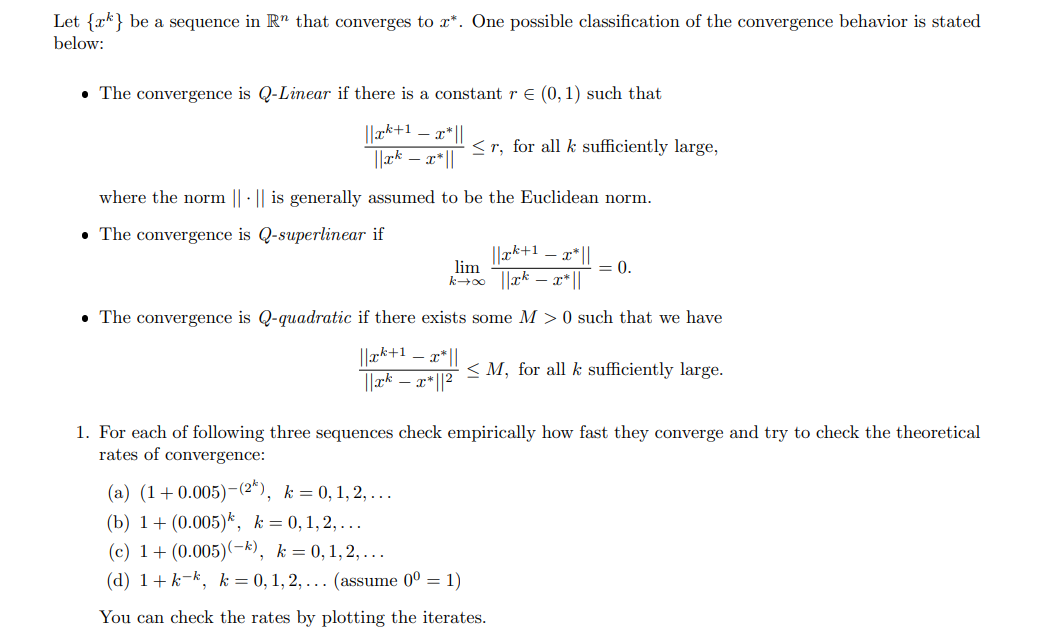

#Exercise 3.2: Data Preparation Exercise (PREP)#

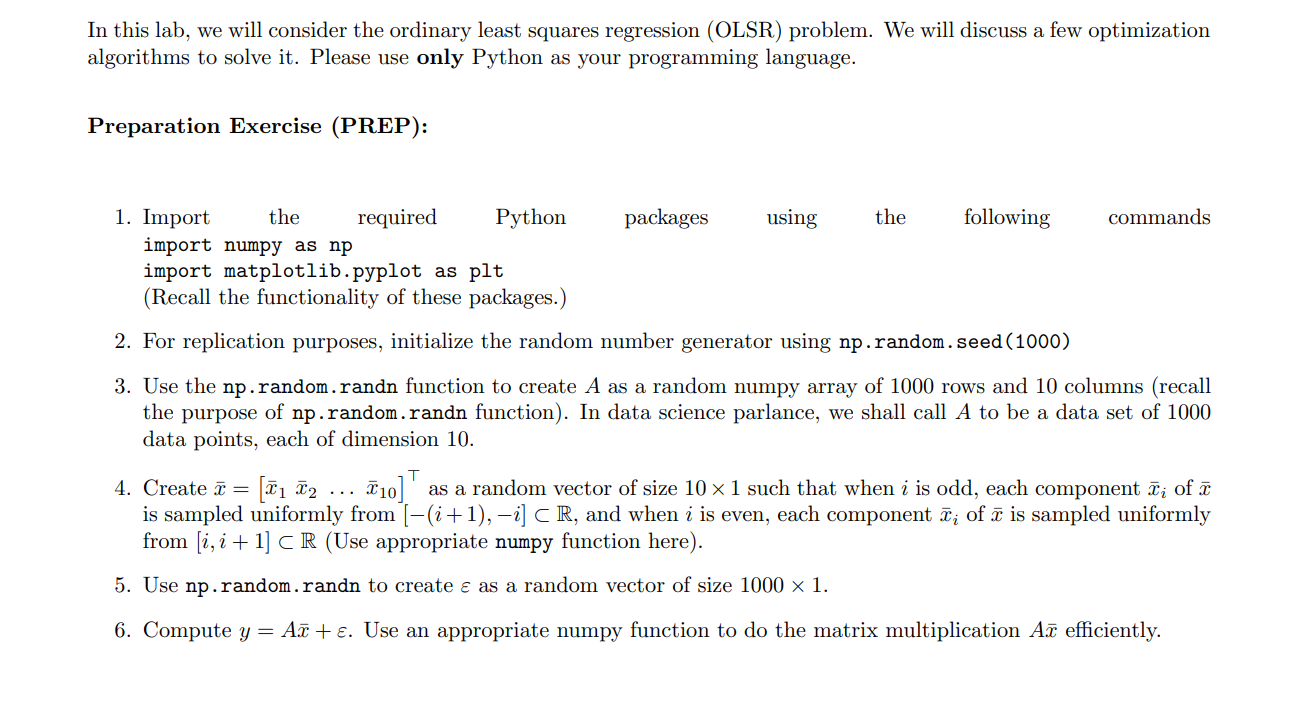

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import random

In [2]:
np.random.seed(1000)
A = np.random.randn(1000,10)

In [3]:
A

array([[-0.8044583 ,  0.32093155, -0.02548288, ..., -0.47998308,
         0.5950355 , -0.46466753],
       [ 0.66728131, -0.80611561, -1.19606983, ...,  0.70569237,
         1.27179528, -0.98674733],
       [-0.33483545, -0.0994817 ,  0.4071921 , ..., -0.38314741,
        -0.82294096,  1.60008337],
       ...,
       [ 0.4520184 , -0.47786694, -1.9209351 , ..., -0.91576825,
         1.28648295,  1.96612251],
       [ 1.5847291 ,  1.04574815,  1.74030946, ..., -0.95352929,
         0.74063574,  1.35391039],
       [-1.27767888,  0.60413859, -0.81028802, ..., -0.06434491,
         0.50570314, -1.63094421]])

In [4]:
print(np.shape(A))

(1000, 10)


In [5]:
x_bar  =[]
for i in range(1,11):
  if i%2 == 0:
      x_bar.append(np.random.uniform(i,i+1))

  else:
      x_bar.append(np.random.uniform(-(i+1),-i))



In [6]:
x_bar = np.array(x_bar)

In [7]:
print(x_bar)

[-1.06258705  2.94307072 -3.34150552  4.58252615 -5.75947573  6.93512469
 -7.61893094  8.16818187 -9.2179964  10.00022174]


In [8]:
epsilon = np.random.randn(1000,1)

In [9]:
np.shape(A @ x_bar)

(1000,)

In [10]:
y = A @ x_bar + epsilon.flatten()

In [11]:
y.shape

(1000,)

3. With a starting point $x0 =[0 0 . . . 0]^⊤
∈ R^{10}$, solve problem (1) using Newton’s method implemented
with backtracking line search (use α0 = 0.99, ρ = 0.5, γ = 0.5 for backtracking line search, and $τ = 10^{−4}$
).
Comment on difficulties (if any) you face when computing the inverse of Hessian (recall that you need to use an
appropriate Python function to compute the inverse of the Hessian). If you face difficulty in computing inverse
of Hessian, try to think of some remedy so that you can avoid the issue.

• Let $x^∗$be the final optimal solution provided by your algorithm. Report the values of $x^∗$ and $\bar{x}$, and discuss the observations.

• Plot the values $log(∥x^k − x^∗∥_2)$ against iterations k = 0, 1, 2, . . ..

• Prepare a different plot for plotting $log(|f(x^k) − f(x^∗)|)$ obtained from Newton’s method against the iterations.

• Comment on the convergence rates of the iterates and the objective function values.

*$minimize_x f(x) = \frac{1}{2}||Ax − y∥^2$*


In [12]:
import numpy as np

def f(x):
    return 0.5*np.linalg.norm(A@x-y)**2

def gradient(x):
    return A.transpose()@A@x - A.transpose()@y

def hessian(x):
    return A.transpose()@A

def dk_f(x):
  return np.linalg.inv(hessian(x))



def get_alpha(x, alpha0, rho, gamma):
  Dk = dk_f(x)
  alpha = alpha0
  pk = -gradient(x)
  while f(x + alpha*Dk@pk) > (f(x) + gamma*alpha*gradient(x)@Dk@pk):
    alpha = rho*alpha
  return alpha

def newton_method_with_backtracking(x0,tol,alpha0, rho, gamma):
  x = np.copy(x0)
  count = 0
  pk = gradient(x)
  xs = []
  xs.append(x)

  while np.linalg.norm(pk)>tol:
    Dk = dk_f(x)
    alpha = get_alpha(x, alpha0, rho, gamma)
    x = x - alpha * Dk @ pk
    pk = gradient(x)
    xs.append(x)
    count += 1

  return count, x, f(x), xs

In [13]:
x0 = np.zeros(10)
alpha0 = 0.99
rho = 0.5
gamma = 0.5
tol = 1e-4

iterations,minimizer,final_value,xks = newton_method_with_backtracking(x0,tol,alpha0,rho, gamma)
print('----------------------------------------------------------------------------------------')
print('Iterations',iterations)
print('Minimizer',minimizer)
print('Final value',final_value)
print('----------------------------------------------------------------------------------------')

----------------------------------------------------------------------------------------
Iterations 5
Minimizer [-1.04982253  2.95189743 -3.34298192  4.60956007 -5.71176195  6.89877618
 -7.62879358  8.16821112 -9.22221199 10.05669293]
Final value 505.647329524551
----------------------------------------------------------------------------------------


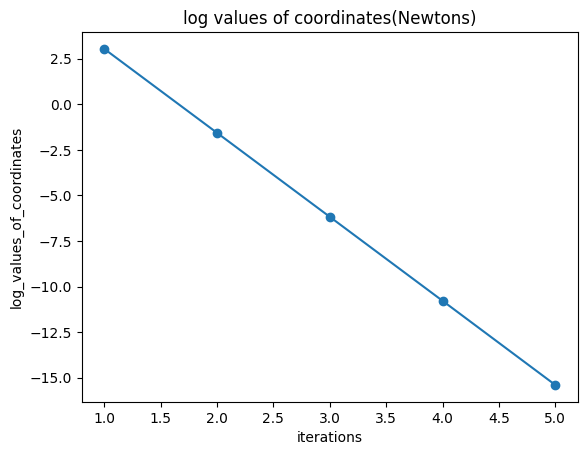

In [14]:
#plot

logvalues=[]
for i in range(iterations):
  normt=np.linalg.norm(xks[i]-minimizer)
  logvalues.append(np.log(normt))


iter=[i+1 for i in range(iterations)]
plt.plot(iter,logvalues,marker='o')
plt.title('log values of coordinates(Newtons)')
plt.xlabel('iterations')
plt.ylabel('log_values_of_coordinates')
plt.show()

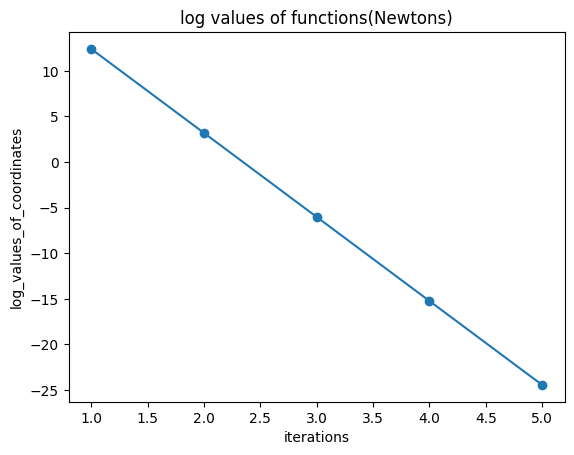

In [15]:

logvalues=[]
for i in range(iterations):
  normt=np.linalg.norm(f(xks[i])-f(minimizer))
  logvalues.append(np.log(normt))
iter=[i+1 for i in range(iterations)]
plt.plot(iter,logvalues,marker='o')
plt.title('log values of functions(Newtons)')
plt.xlabel('iterations')
plt.ylabel('log_values_of_coordinates')
plt.show()

#OBSERVATION

**Here it is seen that the function is converging towards the minimal value at a linear rate**

4. With a starting point $x0 =[0 0 . . . 0]^⊤ ∈ R^{10}$, solve problem (1) using BFGS method implemented with
backtracking line search (use $α_0 = 0.99$, ρ = 0.5, γ = 0.5 for backtracking line search, and $τ = 10^{−4}$
).

• Let $x^∗$ be the final optimal solution provided by BFGS algorithm. Report the values of $x^∗$ and $\bar{x}$, and discuss the observations.

• Plot the values $log(∥x^k − x^∗∥_2)$ against iterations k = 0, 1, 2, . . ..


• Prepare a different plot for plotting $log(|f(x^k)−f(x^∗)|)$ obtained from BFGS method against the iterations.

• Comment on the convergence rates of the iterates and the objective function values.

In [22]:
def get_alpha_bfgs(x, alpha0, rho, gamma, Bk):
  alpha = alpha0
  pk = -gradient(x)
  while f(x + alpha*Bk@pk) > (f(x) + gamma*alpha*gradient(x)@Bk@pk):
    alpha = rho*alpha
  return alpha


def bfgs(x0, tol, alpha0, rho, gamma, max_iter=500):

  x = np.copy(x0)
  n = len(x0)
  Bk = np.eye(n)
  count = 0
  pk = gradient(x)
  xs = []
  xs.append(x)
  while (np.linalg.norm(pk)>tol):
    if count > max_iter:
      break

    alpha = get_alpha_bfgs(x, alpha0, rho, gamma, Bk)
    xnext = x - alpha*(Bk@pk)
    sk = xnext - x
    yk = gradient(xnext) - gradient(x)
    # BFGS
    Bk = np.dot((np.eye(len(x)) - np.outer(sk, yk) / np.dot(yk, sk)), np.dot(Bk, (np.eye(len(x)) - np.outer(yk, sk) / np.dot(yk, sk)))) + np.outer(sk, sk) / np.dot(yk, sk)

    x = xnext
    pk = gradient(x)
    xs.append(x)
    count += 1


  return count, x, f(x), xs

In [18]:
x0 = np.zeros(10)
alpha0 = 0.99
rho = 0.5
gamma = 0.5
tol = 1e-4

# Solve the problem
iterations1,minimizer1,final_value1,xks1 = bfgs(x0, tol, alpha0, rho, gamma, max_iter=500)
print('----------------------------------------------------------------------------------------')
print('Iterations',iterations1)
print('Minimizer',minimizer1)
print('Final value',final_value1)
print('----------------------------------------------------------------------------------------')

----------------------------------------------------------------------------------------
Iterations 18
Minimizer [-1.04982253  2.95189743 -3.34298192  4.60956007 -5.71176195  6.89877618
 -7.62879358  8.16821111 -9.22221199 10.05669293]
Final value 505.64732952455114
----------------------------------------------------------------------------------------


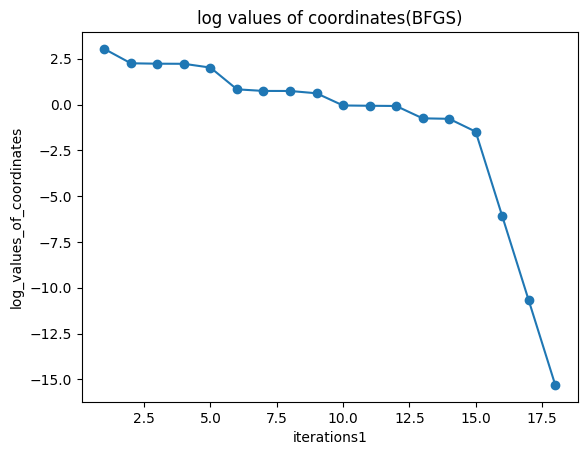

In [19]:
logvalues=[]
for i in range(iterations1):
  norm=np.linalg.norm(xks1[i]-minimizer1)
  logvalues.append(np.log(norm))
iter=[i+1 for i in range(iterations1)]
plt.plot(iter,logvalues,marker='o')
plt.title('log values of coordinates(BFGS)')
plt.xlabel('iterations1')
plt.ylabel('log_values_of_coordinates')
plt.show()

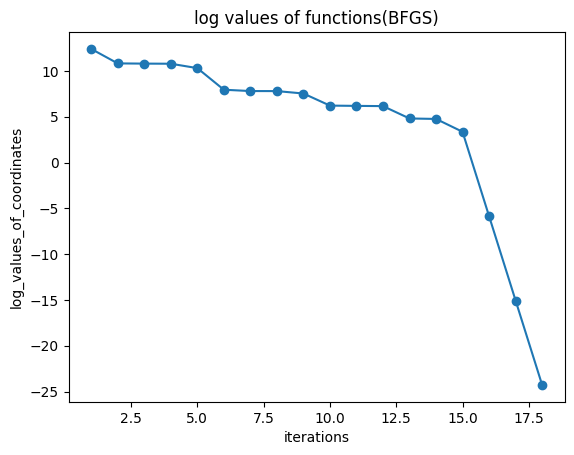

In [21]:
logvalues=[]
for i in range(iterations1):
  norm=np.linalg.norm(f(xks1[i])-f(minimizer1))
  logvalues.append(np.log(norm))
iter=[i+1 for i in range(iterations1)]
plt.plot(iter,logvalues,marker='o')
plt.title('log values of functions(BFGS)')
plt.xlabel('iterations')
plt.ylabel('log_values_of_coordinates')
plt.show()

#Observation
Here it took 18 iterations to reach the minimum value and it is seen that after iteration 15, it starts decreasing at a higher rate.

**5. Compare and contrast the results obtained by Newton’s method and BFGS method and comment on the time
taken by both the methods.**

**Here it was seen that newtons method took 5 iterations and the bfgs method took 18 iterations to reach the minimum value. Since the function is quadratic, newtons method is more efficent than bfgs**